In [47]:
#This Colab Notebook aims to create a machine learning model for classifying exoplanets into three classes using a custom "Habitability Index."

In [48]:
#Importing the libraries to be used during the process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [49]:
#loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/psabhay2003/Stellar-Analytics/refs/heads/main/exoplanet_dataset.csv")
df.head()

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ORIGIN,P_RADIUS,P_PERIOD,P_SEMI_MAJOR_AXIS,...,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00,Mass,13.90,NaN,3.4000,...,NaN,NaN,0.214133,0,0,NaN,0,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60,Mass,2.90,31.884000,0.1994,...,2.437046,2.097783,0.316980,0,0,Hot,0,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10,M-R relationship,2.11,6.883376,0.0678,...,2.827247,1.756317,0.459559,0,0,Hot,0,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20,M-R relationship,3.52,1.921036,0.0291,...,1.476943,0.568374,0.443760,0,0,Hot,0,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94,M-R relationship,2.07,11.119907,0.0911,...,1.759397,0.768502,0.386150,0,0,Hot,0,Lyra,Lyr,Lyre


In [50]:
#exploring the dataset
df.info()
df.shape
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   P_NAME                5599 non-null   object 
 1   P_DETECTION           5599 non-null   object 
 2   P_DISCOVERY_FACILITY  5599 non-null   object 
 3   P_YEAR                5599 non-null   int64  
 4   P_UPDATE              5599 non-null   object 
 5   P_MASS                5592 non-null   float64
 6   P_MASS_ORIGIN         5599 non-null   object 
 7   P_RADIUS              5592 non-null   float64
 8   P_PERIOD              5350 non-null   float64
 9   P_SEMI_MAJOR_AXIS     5595 non-null   float64
 10  P_ECCENTRICITY        4822 non-null   float64
 11  P_INCLINATION         4288 non-null   float64
 12  P_OMEGA               1659 non-null   float64
 13  S_NAME                5599 non-null   object 
 14  S_NAME_HD             971 non-null    object 
 15  S_NAME_HIP           

,P_YEAR,P_MASS,P_RADIUS,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ECCENTRICITY,P_INCLINATION,P_OMEGA,S_RA,S_DEC,...,P_FLUX,P_TEMP_EQUIL,P_TEMP_SURF,S_LUMINOSITY,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE
count,5599.000000,5592.000000,5592.000000,5.350000e+03,5595.000000,4822.000000,4288.000000,1659.000000,5599.000000,5599.000000,...,5.365000e+03,5365.000000,2441.000000,5.366000e+03,5366.000000,5.376000e+03,5595.000000,5599.000000,5599.000000,5599.000000
mean,2016.188962,442.521283,5.715494,7.994082e+04,6.307151,0.076407,86.862548,119.026000,236.798083,19.586974,...,8.430605e+02,792.985586,971.994023,8.007960e+00,3.596167,1.014471e+35,0.425790,0.047151,0.033577,0.019825
std,4.527714,2369.505048,5.331450,5.498596e+06,130.676333,0.150524,10.556374,119.422173,90.260234,35.843622,...,1.745120e+04,484.434177,487.382871,1.110798e+02,6.741964,5.259131e+36,0.077064,0.211981,0.180155,0.184617
min,1992.000000,0.020000,0.310000,9.070629e-02,0.004400,0.000000,0.370000,-233.000000,0.185606,-88.121111,...,3.289901e-10,1.084914,130.661650,8.128305e-07,0.002434,4.356319e-05,0.029269,0.000000,0.000000,0.000000
25%,2014.000000,4.040000,1.780000,4.465382e+00,0.052750,0.000000,86.900000,28.300000,183.518215,-7.826301,...,1.053177e+01,456.758880,638.352490,3.580964e-01,1.615711,4.781093e-01,0.391256,0.000000,0.000000,0.000000
50%,2016.000000,8.750000,2.780000,1.156951e+01,0.102100,0.000000,88.760500,104.490000,285.930740,39.883080,...,6.735305e+01,727.306290,908.701120,8.590135e-01,2.502441,1.361846e+00,0.443760,0.000000,0.000000,0.000000
75%,2020.000000,162.092490,11.900000,4.150555e+01,0.284600,0.090000,89.670000,210.000000,293.579330,45.434686,...,2.923345e+02,1049.902400,1204.326300,2.058263e+00,3.873593,2.556535e+00,0.470516,0.000000,0.000000,0.000000
max,2024.000000,89700.000000,77.342000,4.020000e+08,7506.000000,0.950000,176.092000,395.341000,359.974980,85.736533,...,8.793103e+05,7800.730100,8125.496300,6.309573e+03,214.468620,2.726899e+38,1.003328,1.000000,1.000000,2.000000


In [51]:
#data cleaning and pre-processing

#dropping unnecessary columns
#firstly dropping columns with similar data but in different form
columns_to_drop_1 = ["S_RA_STR", "S_RA_TXT", "S_DEC_STR", "S_DEC_TXT", "S_CONSTELLATION_ABR", "S_CONSTELLATION_ENG"]
#secondly dropping columns with data irrevelant to habitability
columns_to_drop_2 = ["P_DETECTION", "P_DISCOVERY_FACILITY", "P_YEAR", "P_UPDATE", "P_MASS_ORIGIN", "S_NAME_HD", "S_NAME_HIP", "S_CONSTELLATION", "P_OMEGA"]
# df_cleaned = df.drop(columns=columns_to_drop_1 + columns_to_drop_2, axis=1, inplace=True) # inplace=True was causing the issue
df_cleaned = df.drop(columns=columns_to_drop_1 + columns_to_drop_2, axis=1) # Assign the result to df_cleaned
#check whether the columns were dropped
print(df_cleaned.columns) # Print columns of df_cleaned

#filling missing values with median for numerical features
#firstly we have to separate numeric and non-numeric fields otherwise it will give TypeError
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
non_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())
#filling missing non-numeric values with mode
df_cleaned[non_numeric_cols] = df_cleaned[non_numeric_cols].apply(lambda x: x.fillna(x.mode()[0]))

#verifying whether missing values are handled or not
print(df_cleaned.isnull().sum())

Index(['P_NAME', 'P_MASS', 'P_RADIUS', 'P_PERIOD', 'P_SEMI_MAJOR_AXIS',
       'P_ECCENTRICITY', 'P_INCLINATION', 'S_NAME', 'S_TYPE', 'S_RA', 'S_DEC',
       'S_MAG', 'S_DISTANCE', 'S_TEMPERATURE', 'S_MASS', 'S_RADIUS',
       'S_METALLICITY', 'S_AGE', 'S_LOG_LUM', 'S_LOG_G', 'P_ESCAPE',
       'P_POTENTIAL', 'P_GRAVITY', 'P_DENSITY', 'P_HILL_SPHERE', 'P_DISTANCE',
       'P_PERIASTRON', 'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX',
       'P_TEMP_EQUIL', 'P_TEMP_SURF', 'P_TYPE', 'S_TYPE_TEMP', 'S_LUMINOSITY',
       'S_SNOW_LINE', 'S_ABIO_ZONE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT',
       'P_HABZONE_CON', 'P_TYPE_TEMP', 'P_HABITABLE'],
      dtype='object')
P_NAME               0
P_MASS               0
P_RADIUS             0
P_PERIOD             0
P_SEMI_MAJOR_AXIS    0
P_ECCENTRICITY       0
P_INCLINATION        0
S_NAME               0
S_TYPE               0
S_RA                 0
S_DEC                0
S_MAG                0
S_DISTANCE           0
S_TEMPERATURE        0
S_MASS             

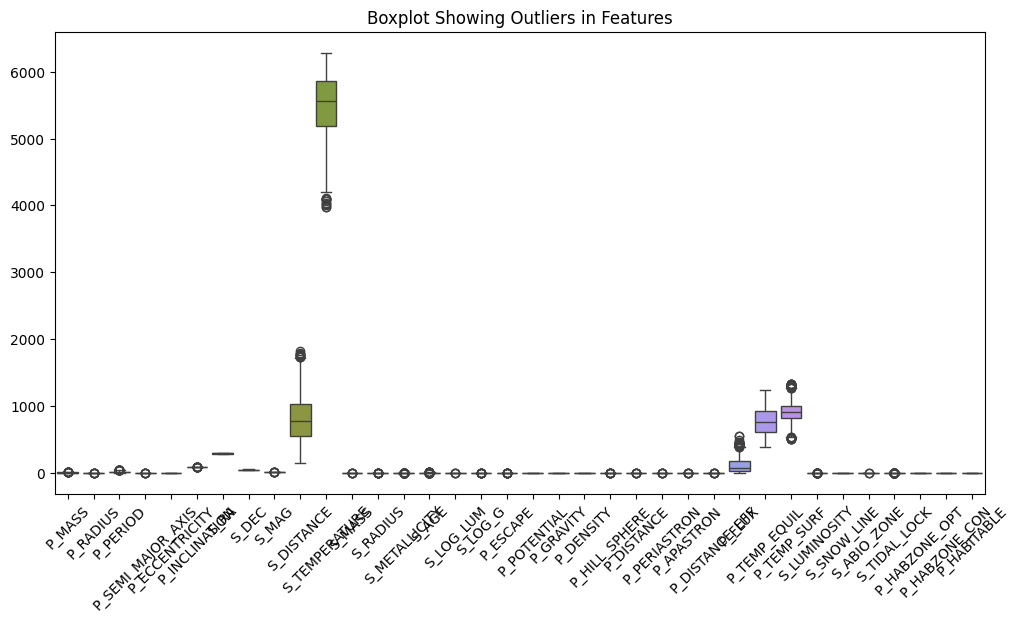

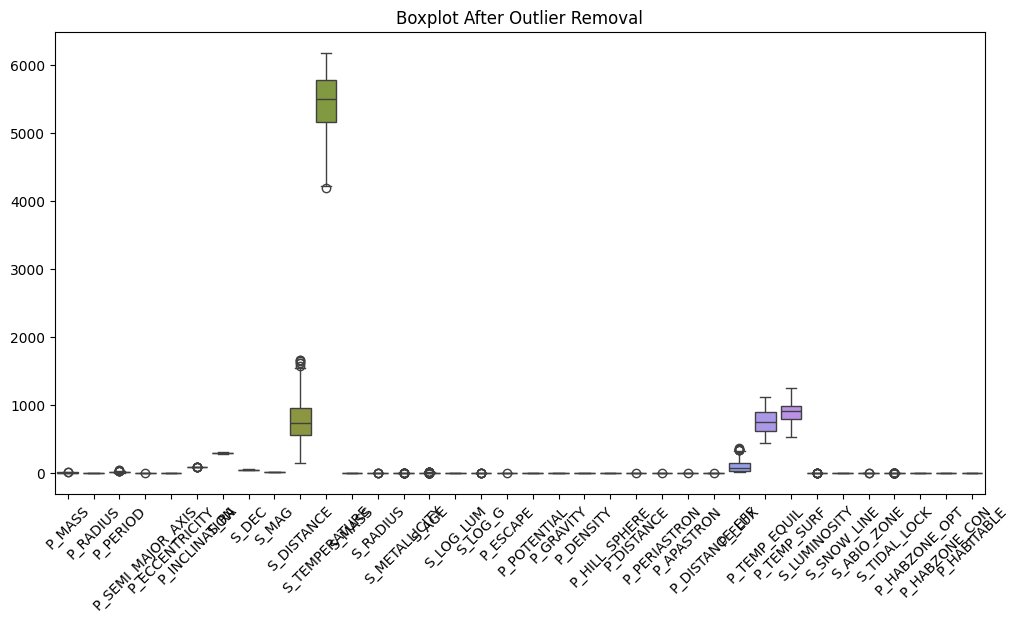

In [53]:
#Outlier Handeling and Normalisation
outlier_features = df_cleaned.select_dtypes(include=np.number).columns
# Boxplot for Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[outlier_features])
plt.title("Boxplot Showing Outliers in Features")
plt.xticks(rotation=45)
plt.show()

# Remove outliers using the IQR method
for col in outlier_features:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

# Plot the boxplot AFTER outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[outlier_features])
plt.title("Boxplot After Outlier Removal")
plt.xticks(rotation=45)
plt.show()


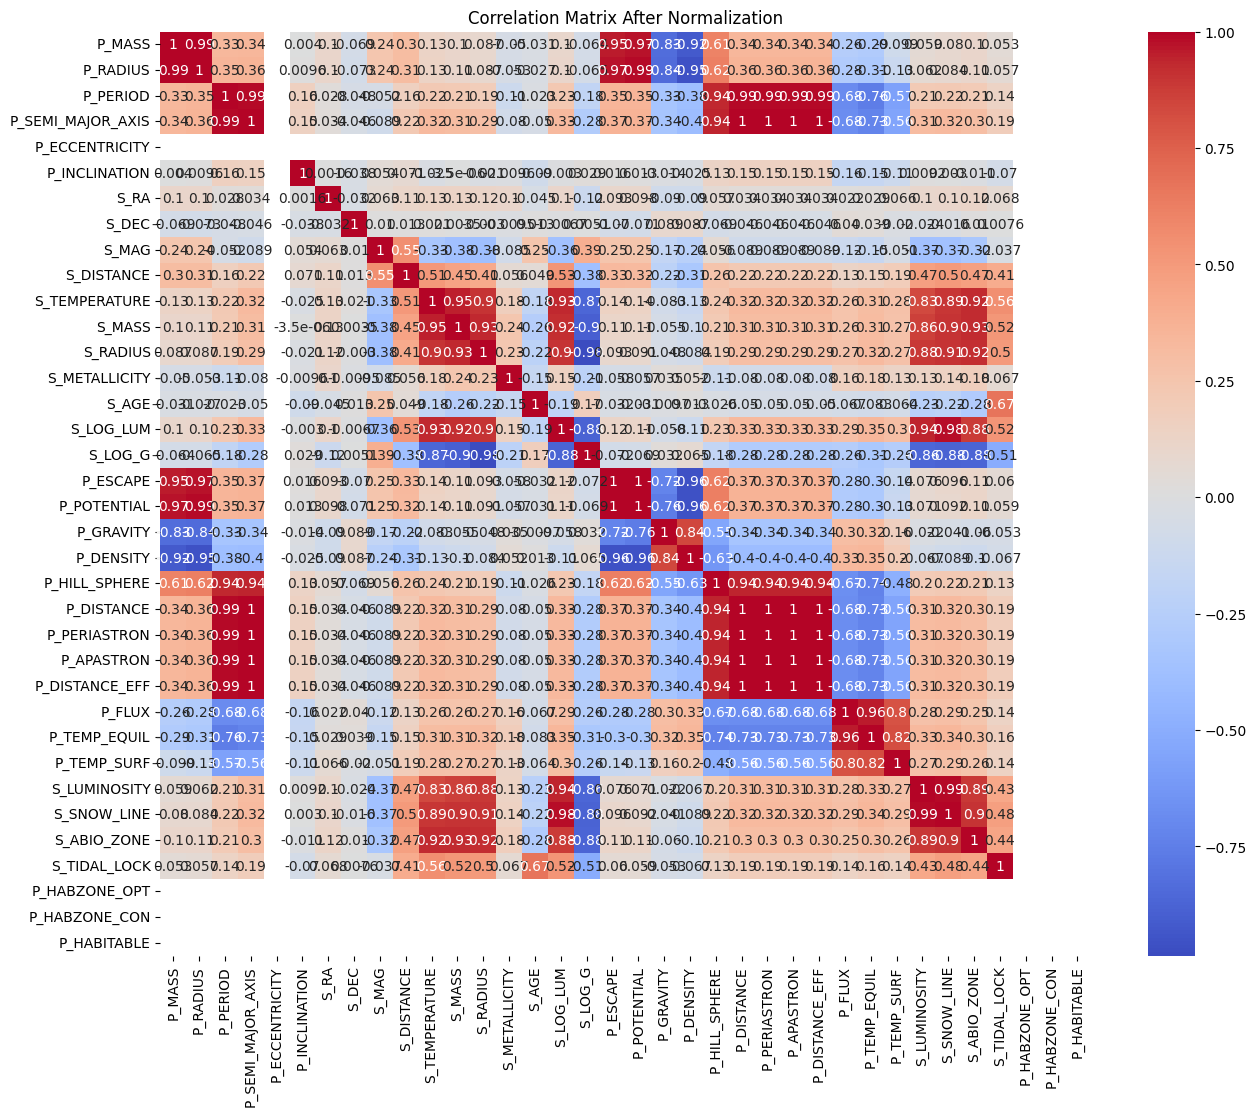

In [54]:
# Normalization: Normalize all numeric features using RobustScaler
#Since many astrophysical features (e.g., mass, period) span several orders of magnitude and can be skewed even after outlier removal, using a RobustScaler—can be beneficial.
#It minimizes the influence of any remaining extreme values.
scaler = RobustScaler()
df_normalized = df_cleaned.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# Optional: Visualize the correlation matrix after normalization
plt.figure(figsize=(15, 12))
corr_matrix = df_normalized[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix After Normalization")
plt.show()

In [55]:
#According to Pearson Correlation, the diagonal line represents perfect correlation of a feature with itself(correlation=1)
#Strong Positive Correlation(+1): When one feature increases, the other also increases
#Strong Negative Correlation(-1): When one feature decreases, the other tends to decrease
#No Correlation(0): No relationship between features
#Based on the above correlation matrix:
#P_MASS and P_POTENTIAL are strong positively correlated(0.98)
#P_ESCAPE and P_POTENTIAL are strong positively correlated(1)
#S_TEMPERATURE, S_MASS, and S_RADIUS are strong positively correlated(0.95)
#P_SEMI_MAJOR_AXIS, P_HILL_SPHERE, P_DISTANCE, P_PERIASTRON, P_APASTRON, P_DISTANCE_EFF are strong positively correlated(0.97-1)
#S_LOG_G, S_LOG_LUM, S_SNOW_LINE, S_RADIUS are strong negatively correlated(-0.7)

#dropping highly correlated fields, keeping important fields undropped
columns_to_drop_3 = ["P_HILL_SPHERE", "P_PERIASTRON", "P_APASTRON", "P_DISTANCE_EFF", "S_TEMPERATURE", "P_POTENTIAL"]
df_cleaned.drop(columns=columns_to_drop_3, axis=1, inplace=True)
#check whether the columns were dropped
print(df_cleaned.columns)

Index(['P_NAME', 'P_MASS', 'P_RADIUS', 'P_PERIOD', 'P_SEMI_MAJOR_AXIS',
       'P_ECCENTRICITY', 'P_INCLINATION', 'S_NAME', 'S_TYPE', 'S_RA', 'S_DEC',
       'S_MAG', 'S_DISTANCE', 'S_MASS', 'S_RADIUS', 'S_METALLICITY', 'S_AGE',
       'S_LOG_LUM', 'S_LOG_G', 'P_ESCAPE', 'P_GRAVITY', 'P_DENSITY',
       'P_DISTANCE', 'P_FLUX', 'P_TEMP_EQUIL', 'P_TEMP_SURF', 'P_TYPE',
       'S_TYPE_TEMP', 'S_LUMINOSITY', 'S_SNOW_LINE', 'S_ABIO_ZONE',
       'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_HABZONE_CON', 'P_TYPE_TEMP',
       'P_HABITABLE'],
      dtype='object')


In [56]:
#FEATURE ENGINEERING: To derive new features by developing relations between the existing features
#Earth Similarity Index(ESI):
#The Earth Similarity Index (ESI) is a scale to physically compare other planets to Earth. The scale is between 0 (no similarity to Earth) and 1 (Earth-like). Planets with an ESI between 0.8 and 1.0 are more likely to be similar to Earth.
#Feature Engineering: To derive new features by developing relations between the existing features
#Earth Similarity Index(ESI):
#The Earth Similarity Index (ESI) is a scale to physically compare other planets to Earth. The scale is between 0 (no similarity to Earth) and 1 (Earth-like). Planets with an ESI between 0.8 and 1.0 are more likely to be similar to Earth.
#ESI helps identify planets with Earth-like physical properties, which is a strong indicator of potential habitability.
# Earth constants for comparison
EARTH_FLUX = 1.0 #Stellar Flux is calculated relative to Earth
EARTH_RADIUS = 1.0 #Planetary Radius is also relative to Earth

import math

def calculate_esi(row):
    S = row['P_FLUX']
    R = row['P_RADIUS']

#Calculating the similarity terms for flux and radius
    term_S = (S - EARTH_FLUX) / (S + EARTH_FLUX)
    term_R = (R - EARTH_RADIUS) / (R + EARTH_RADIUS)

#Computing the combined value (averaging the squared differences)
    value = 0.5 * (term_S**2 + term_R**2)

#ESI is defined as 1 minus the square root of the above value
    ESI = 1 - math.sqrt(value)
    return ESI
df_cleaned['ESI'] = df_cleaned.apply(calculate_esi, axis=1)
print(df_cleaned['ESI'])

2       0.254763
4       0.276721
574     0.298220
585     0.358990
601     0.222859
          ...   
5528    0.276125
5542    0.282759
5557    0.300424
5566    0.287242
5582    0.298640
Name: ESI, Length: 565, dtype: float64


In [57]:
# Long-Term Stability
#This feature highlights planets with minimal extreme climate variations, increasing the likelihood of sustaining life long-term.
#Higher Stability: Values > 0.5 indicate stable orbits, favorable for maintaining consistent climates.
#Moderate Stability: (0.3-0.5) indicate some climate variability, but still potentially habitable.
#Low Stability: Values < 0.3 indicate unstable orbits, extreme temperature swings, or potential ejection from the habitable zone
def calculate_stability(row):
    eccentricity = row['P_ECCENTRICITY']
    stellar_age = row['S_AGE']
    semi_major_axis = row['P_SEMI_MAJOR_AXIS']

    stability = (1 - eccentricity) * np.log1p(stellar_age) / (1 + semi_major_axis)
    return stability
df_cleaned['Long_Term_Stability'] = df_cleaned.apply(calculate_stability, axis=1)
print(df_cleaned['Long_Term_Stability'])

2       1.626663
4       1.033976
574     1.593771
585     1.226988
601     1.131305
          ...   
5528    0.995221
5542    1.063948
5557    0.944808
5566    1.642969
5582    1.611721
Name: Long_Term_Stability, Length: 565, dtype: float64


In [58]:
#Star-Planet Energy Flux Ratio
#To measure how much energy a planet receives from its star.
#The amount of radiation received from the host star directly impacts habitability.
def calculate_flux_ratio(row):
    L_star = row['S_LUMINOSITY']
    F_planet = row['P_FLUX']
    d = row['P_SEMI_MAJOR_AXIS']

    Flux_Ratio = ((F_planet * 4 * np.pi *d ** 2)/(L_star))
    return Flux_Ratio
df_cleaned['Flux Ratio'] = df_cleaned.apply(calculate_flux_ratio, axis=1)
print(df_cleaned['Flux Ratio'])

2       12.566370
4       12.566371
574     12.566371
585     12.566371
601     12.566371
          ...    
5528    12.566370
5542    12.566370
5557    12.566371
5566    12.566371
5582    12.566371
Name: Flux Ratio, Length: 565, dtype: float64


In [59]:
#Habitability Zone Distance(HZD)
#To measure how close a planet is to the ideal habitable zone.
#A planet that’s too far or too close to its star might not be habitable.
#Negative values = Planet is inside the habitable zone
#Positive values = Planet is too far out
#Very negative values = Planet is too close to the star
def habitable_zone_distance(row):
    HZ_inner = 0.75 * row['S_LUMINOSITY'] ** 0.5  # Conservative inner edge
    HZ_outer = 1.77 * row['S_LUMINOSITY'] ** 0.5  # Conservative outer edge
    HZ_center = (HZ_inner + HZ_outer) / 2
    HZ_width = HZ_outer - HZ_inner
    return (row['P_SEMI_MAJOR_AXIS'] - HZ_center) / HZ_width

df_cleaned['HZD'] = df_cleaned.apply(habitable_zone_distance, axis=1)
print(df_cleaned['HZD'])

2      -1.171815
4      -1.098232
574    -1.162473
585    -0.982259
601    -1.130595
          ...   
5528   -1.166994
5542   -1.143990
5557   -1.121461
5566   -1.179447
5582   -1.102457
Name: HZD, Length: 565, dtype: float64


In [60]:
#Escape Velocity Ratio
#To measure the ratio of escape velocity of planet relative to Earth's escape velocity
#The planets with value close to 1 will have almost same Escape Velocity as of Earth
EARTH_ESCAPE_VELOCITY = 11.2  # in km/s
df_cleaned['Escape_Velocity_Ratio'] = df_cleaned['P_ESCAPE'] / EARTH_ESCAPE_VELOCITY
print(df_cleaned['Escape_Velocity_Ratio'])

2       0.138812
4       0.137930
574     0.109043
585     0.126658
601     0.157355
          ...   
5528    0.128660
5542    0.127959
5557    0.121085
5566    0.120542
5582    0.126269
Name: Escape_Velocity_Ratio, Length: 565, dtype: float64


In [61]:
#Tidal Force Ratio
#The Tidal Force Ratio of Earth to Sun is 1:2 = 0.5, any value close to it, indicates strong correlation with Earth and similar habitability
def calculate_tidal_force(row):
    Mp = row['P_MASS']
    Rp = row['P_RADIUS']
    Ms = row['S_MASS']
    d = row['P_SEMI_MAJOR_AXIS']

    Tidal_Force_Ratio = ((Mp/Ms) * (Rp/d ** 3))/0.5
    return Tidal_Force_Ratio
df_cleaned['Tidal_Force_Ratio'] = df_cleaned.apply(calculate_tidal_force, axis=1)
print(df_cleaned['Tidal_Force_Ratio'])

# Create a scaler instance
scaler = MinMaxScaler()

# Normalize the Tidal_Force_Ratio column
df_cleaned['Tidal_Force_Ratio_Norm'] = scaler.fit_transform(df_cleaned[['Tidal_Force_Ratio']])

# Display the original and normalized values
print(df_cleaned['Tidal_Force_Ratio_Norm'].head())

2        70464.028687
4        31092.304087
574      14609.139186
585       5499.597327
601     218960.341091
            ...      
5528     16876.100736
5542     56193.078622
5557      2284.515029
5566     82066.142563
5582     24288.869118
Name: Tidal_Force_Ratio, Length: 565, dtype: float64
2      0.055087
4      0.023950
574    0.010915
585    0.003711
601    0.172523
Name: Tidal_Force_Ratio_Norm, dtype: float64


In [62]:
#Defining a custom Habitability class using rule-based decision tree
def classify_habitability_rule(row):
    score = 0

    # ESI (output ranges from 0.25 to 0.35)
    if row['ESI'] >= 0.35:
        score += 2
    elif row['ESI'] >= 0.25:
        score += 1

    # Long-Term Stability ( output ranges from 1.0 to 1.5, with most values near to 1)
    if row['Long_Term_Stability'] >= 1.2:
        score += 2
    elif row['Long_Term_Stability'] >= 1.0:
        score += 1

    # Habitability Zone Distance (HZD, ideal near -1.0)
    if -1.2 <= row['HZD'] <= -0.8:
        score += 2
    elif (-1.5 <= row['HZD'] < -1.2) or (-0.8 < row['HZD'] <= -0.5):
        score += 1

    # Flux Ratio (ideal near 12.57)
    if abs(row['Flux Ratio'] - 12.57) <= 1:
        score += 2
    elif abs(row['Flux Ratio'] - 12.57) <= 2:
        score += 1

    # Escape Velocity Ratio (output ranges from 0.12 to 0.15)
    if row['Escape_Velocity_Ratio'] >= 0.15:
        score += 2
    elif row['Escape_Velocity_Ratio'] >= 0.12:
        score += 1

    # Tidal Force Ratio (ideal if between 0.8 and 1.2)
    if 0.8 <= row['Tidal_Force_Ratio'] <= 1.2:
        score += 2
    elif (0.5 <= row['Tidal_Force_Ratio'] < 0.8) or (1.2 < row['Tidal_Force_Ratio'] <= 1.5):
        score += 1

    # Determine class based on total score (max value is 12)
    if score >= 9:
        return "Potentially Habitable"
    elif score >= 6:
        return "Marginally Habitable"
    else:
        return "Non-Habitable"

# Applying the rule-based classification
df_cleaned['Habitability_Class'] = df_cleaned.apply(classify_habitability_rule, axis=1)


Accuracy: 0.9601769911504425
Precision: 0.9618517905880407
Recall: 0.9601769911504425
F1 Score: 0.9537778830458409
Confusion Matrix:
 [[205   0   0]
 [  3   1   0]
 [  6   0  11]]
Classification Report:
                        precision    recall  f1-score   support

 Marginally Habitable       0.96      1.00      0.98       205
        Non-Habitable       1.00      0.25      0.40         4
Potentially Habitable       1.00      0.65      0.79        17

             accuracy                           0.96       226
            macro avg       0.99      0.63      0.72       226
         weighted avg       0.96      0.96      0.95       226



<Figure size 1000x600 with 0 Axes>

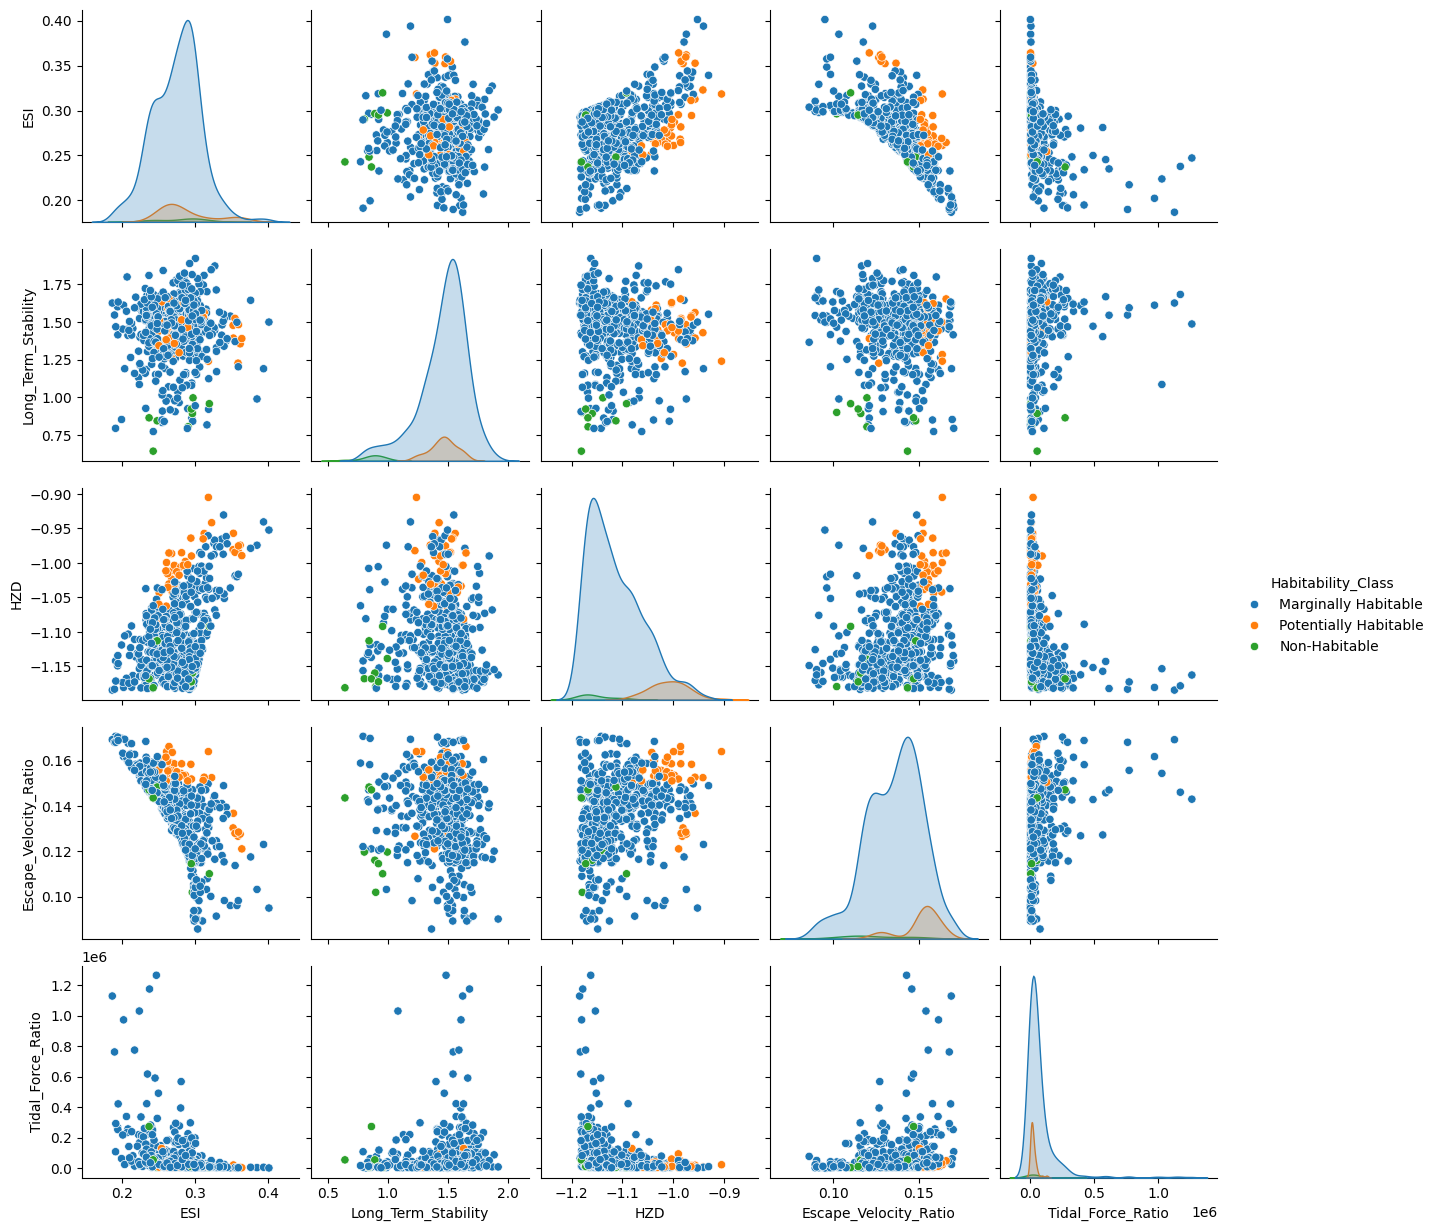

In [63]:
# Selecting features derived in feature engineering
features = ['ESI', 'Long_Term_Stability', 'HZD', 'Flux Ratio', 'Escape_Velocity_Ratio', 'Tidal_Force_Ratio']
X = df_cleaned[features]
y = df_cleaned['Habitability_Class']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
#I increased the test size to classify more planets using the model, it can vary from 20% to 40%
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = dt_model.predict(X_test)
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)
# Visualizing feature relations
plt.figure(figsize=(10, 6))
sns.pairplot(df_cleaned, vars=['ESI',  'Long_Term_Stability', 'HZD', 'Escape_Velocity_Ratio', 'Tidal_Force_Ratio'], hue="Habitability_Class")
plt.show()
#It can be interpreted that there is an imbalance in classes as the model predicts most of the exoplanets as Marginally Habitable, this is true in real-world case as well because discovering a potentially habitable planet is difficult.
#A potentially habitable planet is the one with astronomical features similar to Earth which is rare to occur.
#Therefore, model is correct in classifying most of the planets as marginally habitable.